# Heterodyning: A Mathematical and Computational Introduction
### For first‑year graduate students in mathematics

Heterodyning is a classical idea in signal processing: **multiplying a signal by a complex exponential to shift its Fourier spectrum**.

Although it comes from radio engineering, the underlying mathematics is pure Fourier analysis. In this notebook, we introduce the concept, relate it to Fourier transforms that you already know, and work through a simple computational demonstration.

---

## 1. Motivation

Suppose we have a signal that oscillates at some frequency \(\omega_0\), but the oscillation is *modulated* or *buried* in other content. For example, imagine

$$
f(t) = A(t) \cos(\omega_0 t)
$$

where \(A(t)\) is slowly varying. In many cases we want to:

* Extract the envelope \(A(t)\).
* Shift \(f\)'s dominant oscillation down to **baseband** (near frequency \(0\)).
* Study local frequency content.

Multiplying by a complex exponential achieves this:

$$
g(t) = f(t) e^{-i\omega_0 t}.
$$

This is the essence of **heterodyning**.

---

## 2. The Mathematical Idea

Let \(f(t)\) be a "nice" function and let its Fourier transform be
$$
\widehat{f}(\omega) = \int_{\mathbb R} f(t) e^{-i\omega t}\, dt.
$$

Consider multiplying the signal by a complex exponential:
$$
g(t) = f(t) e^{-i\omega_0 t}.
$$

Then,
$$
\widehat{g}(\omega) = \widehat{f}(\omega + \omega_0).
$$

This is the **frequency‑shift property**: multiplication in the time domain corresponds to translation in the frequency domain.

Heterodyning simply *chooses* \(\omega_0\) so that an oscillatory component moves to a convenient location in the spectrum (often to the origin).

---

## 3. A Simple Example

We will consider the signal

$$
f(t) = \big(1 + 0.3\cos(0.2 t)\big) \cos(10t).
$$

This is a high‑frequency oscillation at frequency 10, with a slowly varying envelope.

We will:
1. Plot the signal.
2. Compute its Fourier transform.
3. Heterodyne it by multiplying with \(e^{-i 10 t}\).
4. Inspect the resulting baseband signal.

This illustrates how heterodyning reveals the underlying structure.

---

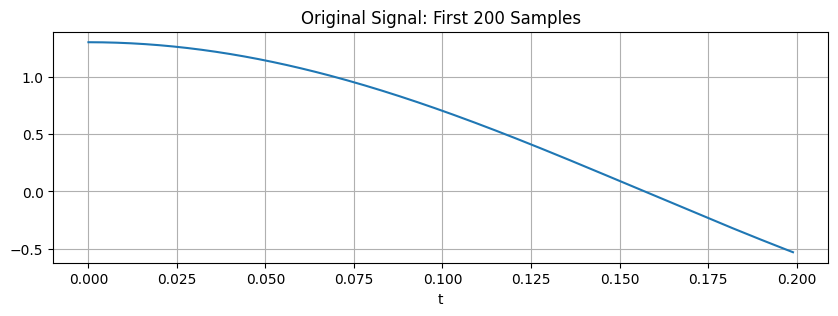

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
T = 2000        # number of samples
dt = 0.001      # sampling interval
t = np.arange(T) * dt

# Define the modulated signal
f = (1 + 0.3*np.cos(0.2*t)) * np.cos(10*t)

plt.figure(figsize=(10, 3))
plt.plot(t[:200], f[:200])
plt.title('Original Signal: First 200 Samples')
plt.xlabel('t')
plt.grid(True)
plt.show()

## 4. Fourier Spectrum Before Heterodyning

We compute the Fourier transform numerically and inspect the magnitude spectrum. We expect strong peaks around \(\pm 10\).

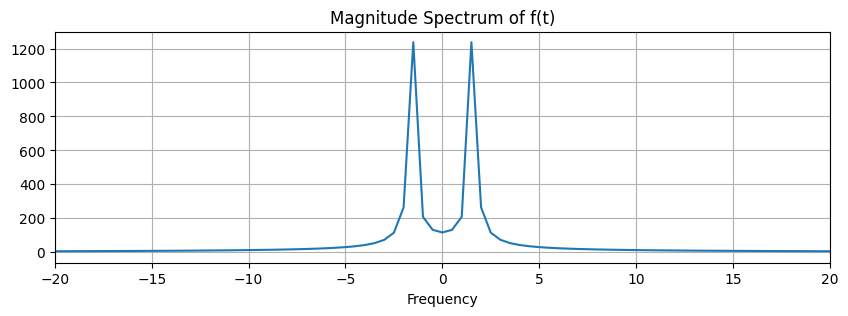

In [2]:
F = np.fft.fftshift(np.fft.fft(f))
freq = np.fft.fftshift(np.fft.fftfreq(T, dt))

plt.figure(figsize=(10, 3))
plt.plot(freq, np.abs(F))
plt.xlim(-20, 20)
plt.title('Magnitude Spectrum of f(t)')
plt.xlabel('Frequency')
plt.grid(True)
plt.show()

As expected, the energy is concentrated near ±10.

---

## 5. Heterodyning: Shifting the Frequency to Baseband

To shift the component at frequency 10 to 0, we multiply by \(e^{-i 10 t}\):

$$
g(t) = f(t) e^{-i10t}.
$$

This should move the peak at 10 to 0, leaving a slowly varying envelope near frequency 0.

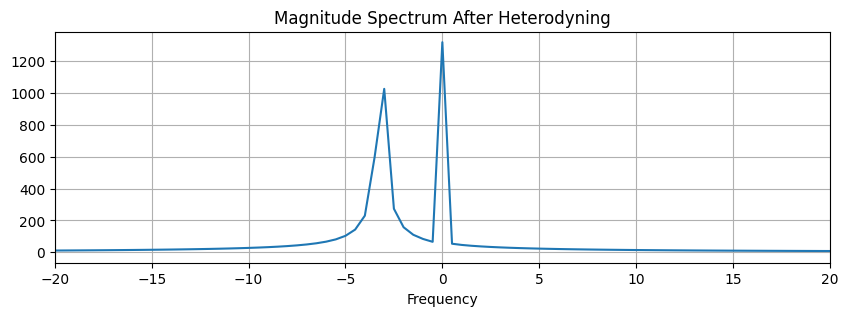

In [3]:
g = f * np.exp(-1j * 10 * t)

G = np.fft.fftshift(np.fft.fft(g))

plt.figure(figsize=(10, 3))
plt.plot(freq, np.abs(G))
plt.xlim(-20, 20)
plt.title('Magnitude Spectrum After Heterodyning')
plt.xlabel('Frequency')
plt.grid(True)
plt.show()

The spectral energy is now concentrated near frequency 0.

This is exactly what heterodyning accomplishes.

---

## 6. Inspecting the Baseband Signal

In theory,
$$
g(t) \approx \frac{1}{2} A(t) + \frac{1}{2} A(t)e^{-i 20 t}.
$$

The dominant term is (1/2)A(t), which is slowly varying. Let's plot the real part of g(t).

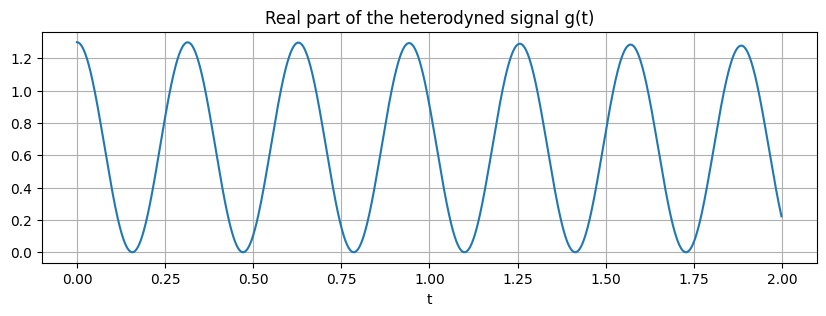

In [4]:
plt.figure(figsize=(10, 3))
plt.plot(t[:2000], np.real(g[:2000]))
plt.title('Real part of the heterodyned signal g(t)')
plt.xlabel('t')
plt.grid(True)
plt.show()

You can see that the rapid oscillations are gone; what remains is the slowly varying envelope and a small high‑frequency residual at 20.

---

## 7. Optional: Low‑Pass Filtering


After heterodyning, one often applies a low‑pass filter to remove the high‑frequency residual at ±20.

We'll apply a simple rectangular filter in the Fourier domain.

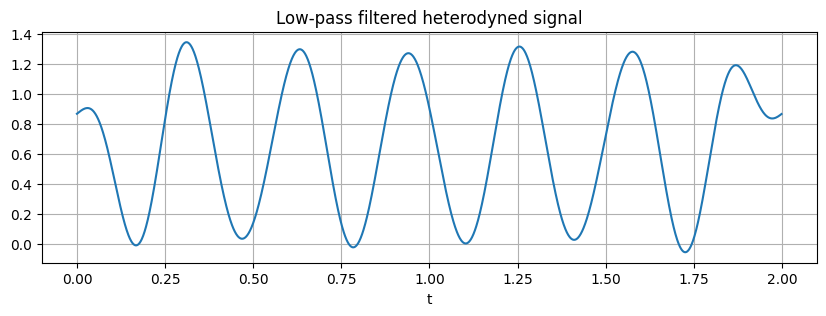

In [5]:
G_lp = G.copy()

# Zero out frequencies above 5
mask = np.abs(freq) > 5
G_lp[mask] = 0
g_lp = np.fft.ifft(np.fft.ifftshift(G_lp))

plt.figure(figsize=(10, 3))
plt.plot(t, np.real(g_lp))
plt.title('Low‑pass filtered heterodyned signal')
plt.xlabel('t')
plt.grid(True)
plt.show()

Now we recover (up to constants) the envelope \(A(t)\).

---

## 8. Summary

* Heterodyning is multiplication by a complex exponential.
* It shifts a signal's spectral content in a controlled way.
* When applied at the correct frequency, it moves an oscillation to the origin.
* After heterodyning, low‑pass filtering often isolates slow variation or envelopes.

This is the core idea behind radio receivers, quadrature demodulation, and many time‑frequency analysis techniques.

---

## End of Notebook
